In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggplot2))

In [2]:
file_extensions <- c(".png", ".pdf")

plot_theme <- theme(
    title = element_text(size = 9),
    axis.title = element_text(size = 9),
    legend.text = element_text(size = 7),
    legend.title = element_text(size = 9),
    legend.key.size = unit(0.5, "cm"),
    strip.text = element_text(size = 10),
    strip.background = element_rect(colour="black", fill="#fdfff4")
)

In [3]:
# Load data
file <- file.path("data", "lsa_distribution_full_results.tsv.gz")

lsa_cols <- readr::cols(
    input_data_type_full = readr::col_character(),
    dist = readr::col_double(),
    input_data_type = readr::col_character(),
    shuffled = readr::col_character(),
    assay = readr::col_character(),
    data_level = readr::col_character(),
    model = readr::col_character()
)

lsa_df <- readr::read_tsv(file, col_types = lsa_cols)
lsa_df$model <- factor(lsa_df$model, levels = c("Complete", "PCA", "vanilla", "beta", "mmd"))
lsa_df$model <- dplyr::recode(lsa_df$model, "vanilla" = "Vanilla VAE", "beta" = "Beta VAE", "mmd" = "MMD VAE")

print(dim(lsa_df))
head(lsa_df, 3)

[1] 25047     7


input_data_type_full,dist,input_data_type,shuffled,assay,data_level,model
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<fct>
VAE Unshuffled,30.60872,VAE,Unshuffled,L1000,level5,MMD VAE
VAE Unshuffled,4.92270,VAE,Unshuffled,L1000,level5,MMD VAE
VAE Unshuffled,11.21907,VAE,Unshuffled,L1000,level5,MMD VAE


In [4]:
panel_a_gg <- (
    ggplot(
        lsa_df %>%
            dplyr::filter(assay == 'cell-painting', data_level == 'level5'),
        aes(y = dist, x = model, color = shuffled)
    )
    + geom_point(size = 0.2, alpha = 0.5, position = position_jitterdodge())
    + geom_boxplot(aes(middle = mean(dist)), size = 0.2, alpha = 0.8, outlier.alpha = 0)
    + theme_bw()
    + plot_theme
    + ylab("L2 distance between\nreal 'A|B' and predicted 'A|B'")
    + xlab("")
    + scale_color_manual(
        "Data",
        values = c("Shuffled" = "#E66100", "Unshuffled" = "#5D3A9B"),
        labels = c("Shuffled" = "Shuffled", "Unshuffled" = "Real")
    )
    + ggtitle("Cell Painting - Level 5")
)

In [5]:
panel_b_gg <- (
    ggplot(
        lsa_df %>%
            dplyr::filter(assay == 'cell-painting', data_level == 'level4'),
        aes(y = dist, x = model, color = shuffled)
    )
    + geom_point(size = 0.2, alpha = 0.5, position = position_jitterdodge())
    + geom_boxplot(aes(middle = mean(dist)), size = 0.2, alpha = 0.8, outlier.alpha = 0)
    + theme_bw()
    + plot_theme
    + ylab("L2 distance between\nreal 'A|B' and predicted 'A|B'")
    + xlab("")
    + scale_color_manual(
        "Data",
        values = c("Shuffled" = "#E66100", "Unshuffled" = "#5D3A9B"),
        labels = c("Shuffled" = "Shuffled", "Unshuffled" = "Real")
    )
    + ggtitle("Cell Painting - Level 4")
)

In [6]:
panel_c_gg <- (
    ggplot(
        lsa_df %>%
            dplyr::filter(assay == 'L1000', data_level == 'level5'),
        aes(y = dist, x = model, color = shuffled)
    )
    + geom_point(size = 0.2, alpha = 0.5, position = position_jitterdodge())
    + geom_boxplot(aes(middle = mean(dist)), size = 0.2, alpha = 0.8, outlier.alpha = 0)
    + theme_bw()
    + plot_theme
    + ylab("L2 distance between\nreal 'A|B' and predicted 'A|B'")
    + xlab("Models")
    + scale_color_manual(
        "Data",
        values = c("Shuffled" = "#E66100", "Unshuffled" = "#5D3A9B"),
        labels = c("Shuffled" = "Shuffled", "Unshuffled" = "Real")
    )
    + ggtitle("L1000 - Level 5")
)

In [7]:
# Get legend
sup_fig_legend <- cowplot::get_legend(panel_a_gg)

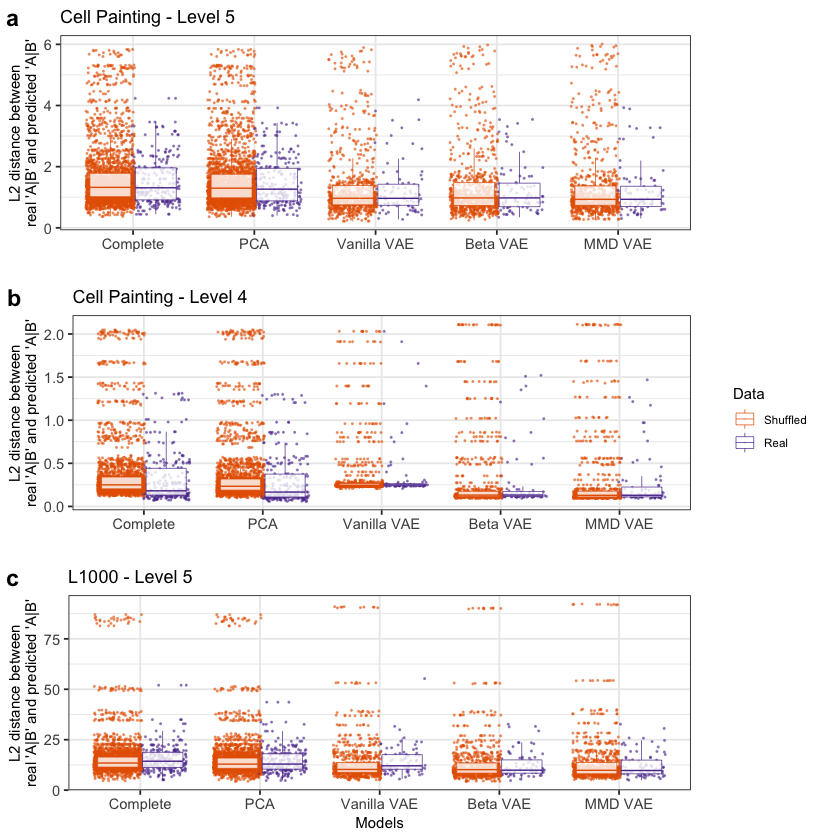

In [8]:
# Combine figure together
sup_fig_gg <- (
    cowplot::plot_grid(
        cowplot::plot_grid(
            panel_a_gg + theme(legend.position = "none"),
            panel_b_gg + theme(legend.position = "none"),
            panel_c_gg + theme(legend.position = "none"),
            labels = c("a", "b", "c"),
            nrow = 3
        ),
        sup_fig_legend,
        rel_widths = c(1, 0.2),
        ncol = 2
    )
)

sup_fig_gg

In [9]:
# Save figure
output_file_base <- file.path("output", "sup_fig_lsa_distributions")
for (file_extension in file_extensions) {
    output_file <- paste0(output_file_base, file_extension)
    cowplot::save_plot(output_file, sup_fig_gg, dpi = 500, base_width = 6, base_height = 8)
}